In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import os
import urllib.request

data_url = 'https://raw.githubusercontent.com/elephantscale/datasets/master/credit-card-default/default2.csv'
data_location = os.path.basename(data_url)

if not os.path.exists (data_location):
    print("Downloading : ", data_url)
    urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)
data = pd.read_csv(data_location)
data.sample(10)

data_location: default2.csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
22025,22026,60000,2,1,2,27,0,0,0,0,...,51237,29999,28972,3000,3016,5011,1005,1000,14000,0
25533,25534,300000,2,2,1,33,0,0,0,0,...,276110,279623,285719,11000,12000,20002,10002,11002,26002,0
6795,6796,300000,2,1,1,38,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,1100,0
8659,8660,50000,2,2,2,24,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
24916,24917,200000,1,2,2,36,0,0,0,0,...,156401,159300,160571,25001,5701,5576,6009,5811,6156,1
21909,21910,30000,2,2,2,23,0,0,0,0,...,26929,19610,20591,5896,3002,2130,2,3004,8013,0
18226,18227,60000,1,2,2,51,0,0,0,0,...,29059,29244,29462,1450,1516,1391,966,997,948,0
7894,7895,80000,2,3,1,44,-1,-1,-1,-1,...,24243,7043,13531,10735,2957,24277,7046,13671,3206,0
18394,18395,290000,2,2,2,24,0,0,0,0,...,143679,375499,222575,8000,6500,6100,235075,10047,7500,1
11587,11588,420000,2,3,1,36,-2,-2,-1,0,...,279493,285447,291183,0,277510,10000,10000,10000,10500,0


In [3]:
## Check data skew
data['default'].value_counts()
data['default'].value_counts(normalize=True)

0   0.78
1   0.22
Name: default, dtype: float64

In [4]:
label_col = 'default'

feature_columns = data.columns
## TODO : drop 'ID' and 'default' columns
feature_columns = feature_columns.drop (['ID', 'default'])
#print (feature_columns)
X = data[feature_columns].values
y = data[[label_col]].values

print (X.shape)
print (y.shape)

(30000, 23)
(30000, 1)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import xgboost as xgb
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.05, 
    #loss_function='CrossEntropy'
)

## Choose models, we want to compare
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB',xgb.XGBClassifier() ))
models.append(('CAT', clf ))
models.append(('NB', GaussianNB()))


results = []
names = []
## For classification -  scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
# For regression - r2 rmse mae
scoring_metric = 'accuracy'
y2 = y.ravel() #np.ravel(y)
for name, model in models:
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_val_score(model, X, y2, cv=5, scoring=scoring_metric, n_jobs=-1)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name)
    print("{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(cv_results), np.median(cv_results), np.std(cv_results), cv_results))

LR: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.7785     0.77883333 0.77883333 0.77883333 0.77883333]
KNN: accuracy : avg=0.76, median=0.75,  std=0.01,  cv_results=[0.7495     0.74966667 0.752      0.76133333 0.763     ]
CART: accuracy : avg=0.72, median=0.72,  std=0.01,  cv_results=[0.71833333 0.714      0.72033333 0.73633333 0.73483333]
RF: accuracy : avg=0.82, median=0.82,  std=0.01,  cv_results=[0.80316667 0.80683333 0.81983333 0.8275     0.82116667]
GB: accuracy : avg=0.82, median=0.82,  std=0.01,  cv_results=[0.807      0.80966667 0.824      0.83466667 0.826     ]
SVM: accuracy : avg=0.78, median=0.78,  std=0.00,  cv_results=[0.77866667 0.77883333 0.77883333 0.77883333 0.77883333]
XGB: accuracy : avg=0.81, median=0.81,  std=0.01,  cv_results=[0.80266667 0.80816667 0.81333333 0.82683333 0.81983333]
0:	learn: 0.6651647	total: 97.6ms	remaining: 390ms
1:	learn: 0.6403670	total: 134ms	remaining: 201ms
2:	learn: 0.6187500	total: 176ms	remaining: 117ms
3:	learn: 0.598817

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CAT: accuracy : avg=0.82, median=0.82,  std=0.01,  cv_results=[0.807      0.80966667 0.82616667 0.83066667 0.82433333]
NB: accuracy : avg=0.38, median=0.37,  std=0.02,  cv_results=[0.372      0.36866667 0.3635     0.38       0.41133333]


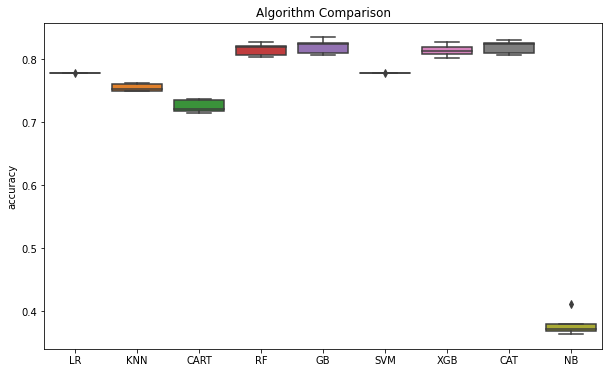

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=results)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()